In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [42]:
# cargando csv
btc = pd.read_csv('Bitcoin.csv', sep=",", encoding='latin-1')
btc.shape

(2854, 7)

El dataset cuenta con 2854 registros y 7 filas.

In [43]:
btc.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,USD
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,USD
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,USD
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,USD
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,USD


In [44]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2854 non-null   object 
 1   Open      2854 non-null   float64
 2   High      2854 non-null   float64
 3   Low       2854 non-null   float64
 4   Close     2854 non-null   float64
 5   Volume    2854 non-null   int64  
 6   Currency  2854 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 156.2+ KB


Valores nulos:
* El dataset no presenta valores nulos.

Tipos de datos:
* La columna 'Date' debe ser transformada a tipo datetime.
* Las columnas 'Open', 'High', 'Low', 'Close' son de tipo `float64`. OK
* La columna 'Volume' es de tipo `int64`. OK
* La columna 'Currency' de tipo `object`. OK

In [35]:
#Estadísticas Básicas
btc.describe()

,Open,High,Low,Close,Volume
count,2854.000000,2854.000000,2854.000000,2854.000000,2.854000e+03
mean,12444.903732,12768.600474,12081.369272,12450.552730,1.545053e+10
std,16577.341124,17005.417766,16080.505775,16572.919487,1.991923e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,636.274521,642.085510,625.957230,637.079514,8.649955e+07
50%,6572.784912,6674.324951,6453.779785,6578.659912,5.864455e+09
75%,11538.891113,11854.514404,11288.520996,11568.815674,2.632111e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


Interpretación de `btc.describe()`: _____

Ej: las medias de todas las variables numéricas (menos 'Volume') rondan entre los 12,000 y 13,000.


In [5]:
#Cantidad de Filas y columnas
Bitcoin.shape

(2854, 7)

In [6]:
#Nombre columnas:
Bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [7]:
## acn: ¿para qué se hace esto?
#Observamos el rango de fechas de los registros
#Date = pd.date_range(min(Bitcoin['Date']),max(Bitcoin['Date']),freq='Y')
#Date

DatetimeIndex(['2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [45]:
#Transformamos la columna Date de (str) a (date)
btc['Date'] =  pd.to_datetime(btc['Date'])
btc = btc.set_index('Date')

In [47]:
# corroboramos cambio de tipo
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2854 entries, 2014-09-17 to 2022-07-10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      2854 non-null   float64
 1   High      2854 non-null   float64
 2   Low       2854 non-null   float64
 3   Close     2854 non-null   float64
 4   Volume    2854 non-null   int64  
 5   Currency  2854 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 156.1+ KB


In [48]:
#EDA Utiizamos ECDF´s plot para observar la distribución de los precios de BITCOIN
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

In [53]:
ecdf_Open_x, ecdf_Open_y = ecdf(btc.Open)
ecdf_High_x, ecdf_High_y = ecdf(btc.High)
ecdf_Low_x, ecdf_Low_y = ecdf(btc.Low)
ecdf_Close_x, ecdf_Close_y = ecdf(btc.Close)
ecdf_Volume_x, ecdf_Volume_y = ecdf(btc.Volume)

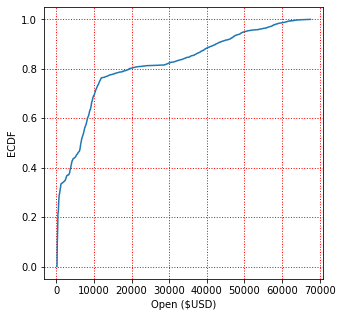

In [75]:
#Ploteamos nuestro ECDF 

plt.figure(figsize=(5,5))
#plt.plot(ecdf_open_x, ecdf_open_y, marker='.',linestyle='-')
plt.plot(ecdf_Open_x, ecdf_Open_y)
plt.xlabel('Open ($USD)')
plt.ylabel('ECDF')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

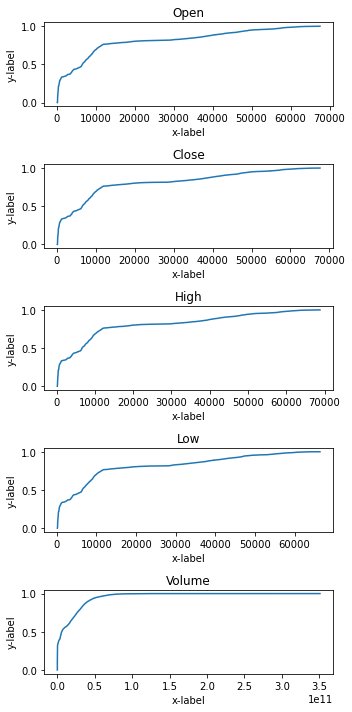

In [68]:
# usar subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(5, 10))
axs[0].plot(ecdf_Open_x, ecdf_Open_y)
axs[0].set_title('Open')
axs[1].plot(ecdf_Close_x, ecdf_Close_y)
axs[1].set_title('Close')
axs[2].plot(ecdf_High_x, ecdf_High_y)
axs[2].set_title('High')
axs[3].plot(ecdf_Low_x, ecdf_Low_y)
axs[3].set_title('Low')
axs[4].plot(ecdf_Volume_x, ecdf_Volume_y)
axs[4].set_title('Volume')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

fig.tight_layout()
plt.show()

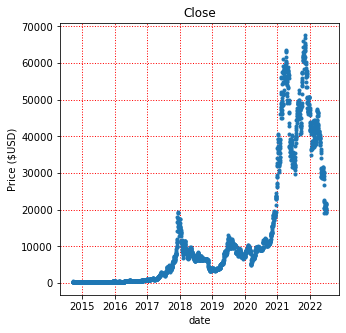

In [79]:
date = btc.index
close = btc['Close']

plt.figure(figsize=(5,5))
plt.plot(date, close, marker='.', linestyle='none')
plt.xlabel('date')
plt.ylabel('Price ($USD)')
plt.title('Close')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

Interpretación de serie de tiempo: ____

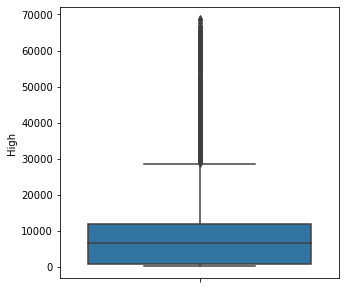

In [83]:
#Box Plot para observar mejor OUTLIERS
plt.figure(figsize=(5,5))
sns.boxplot(y='High', data=btc)
plt.ylabel('High')
plt.show()

Interpretación de boxplot: ____

<AxesSubplot:>

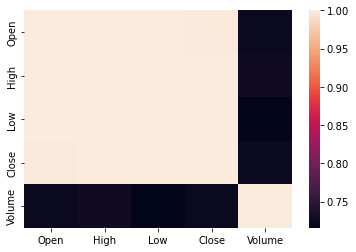

In [84]:
#Correlación de los FEATURES
sns.heatmap(btc.corr())

Interpretación de mapa de corrleación: ____

# Modelo

In [131]:
X = btc.drop(columns=['Close','Currency'])
y = btc.Close

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42,)

In [133]:
# Creating regressor
reg = LinearRegression().fit(X,y)

In [134]:
reg.score(X,y)

0.9995898687006445

In [135]:
reg.coef_

array([-5.54429506e-01,  9.14970680e-01,  6.33916348e-01,  5.14219001e-10])

In [136]:
reg.intercept_

0.9570596639950963

In [137]:
y_pred = reg.predict(X_test)

## Resultados

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [139]:
mean_absolute_error(y_test, y_pred)

164.981764834014

In [140]:
mean_squared_error(y_test, y_pred)

134438.208996181

In [162]:
results = pd.DataFrame()
results['actual'] = y_test.tolist()
results['pred'] = y_pred.tolist()

results

,actual,pred
0,3706.052246,3694.297348
1,11790.916992,11677.021741
2,689.651001,684.988743
3,11182.806641,11634.699862
4,243.931000,243.464483
...,...,...
566,9427.687500,9447.719463
567,253.828003,254.603228
568,7531.663574,7402.663619
569,237.283005,237.920693


<AxesSubplot:xlabel='actual', ylabel='pred'>

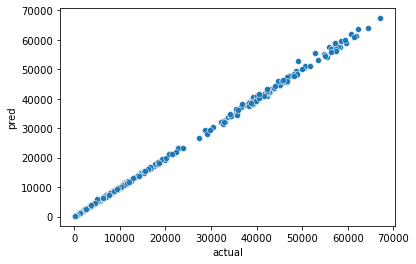

In [163]:
sns.scatterplot(data=results, x='actual', y='pred')